In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, preprocessing
from sklearn.model_selection  import train_test_split 
import statsmodels.formula.api as sm
from operator import itemgetter

In [2]:
data_co2 = pd.read_csv('Data/Footprint/bristol_CO2_data', encoding='latin-1').set_index('LSOA')
data_lsoa = gpd.read_file('Data/Spatial/LSOA_EW.shp').set_index('geo_code')
data_cen = pd.read_csv('Data/Census/all_data.csv').set_index('GEO_CODE')
data_imd = pd.read_csv('Data/Census/imd_all_score.csv').set_index('Reference area').join(gpd.read_file('Data/Spatial/LSOA_EW.shp').set_index('geo_label'), how = 'inner').set_index('geo_code').drop('http://opendatacommunities.org/def/ontology/geography/refArea', axis = 1).iloc[:,:9]

# IMD

In [3]:
data_imd.columns.to_list()

['a. Index of Multiple Deprivation (IMD)',
 'b. Income Deprivation Domain',
 'c. Employment Deprivation Domain',
 'd. Education, Skills and Training Domain',
 'e. Health Deprivation and Disability Domain',
 'f. Crime Domain',
 'g. Barriers to Housing and Services Domain',
 'h. Living Environment Deprivation Domain',
 'i. Income Deprivation Affecting Children Index (IDACI)']

In [4]:
data_imd.columns = data_imd.columns.str[0]
col_list = data_imd.columns.to_list()

In [5]:
ln_col_list = []
for item in col_list:
    data_imd[item +'_ln'] = np.log(data_imd[item] + 0.00001)
    ln_col_list.append('ln_'+ item)

C:\Users\gylk\AppData\Local\Continuum\anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000148C7D7D438>,
      dtype=object)

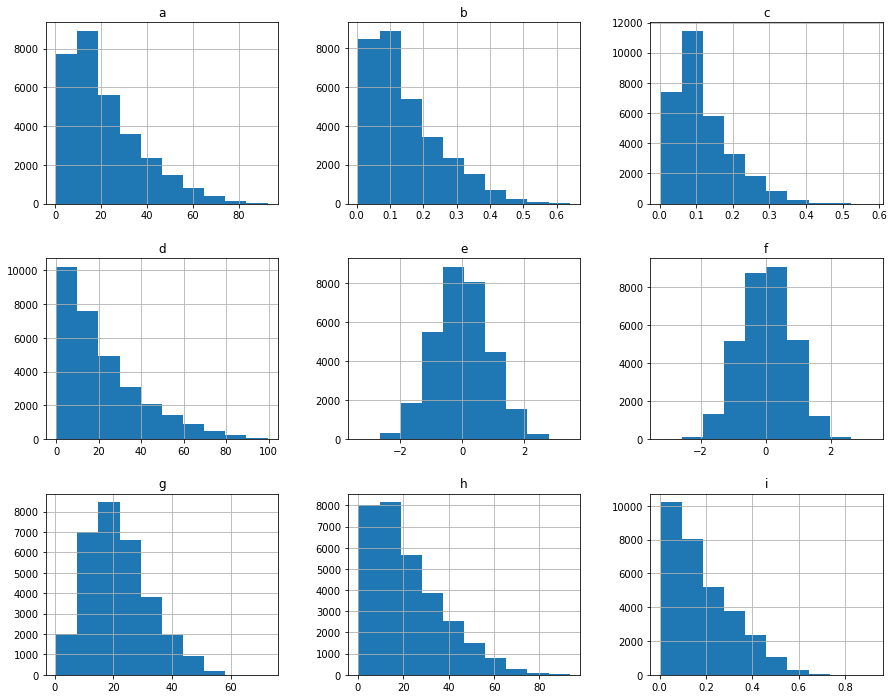

In [6]:
data_imd[col_list].hist(figsize=(15,12))

In [7]:
col_list_2 = ['a_ln', 'b_ln', 'c_ln', 'd_ln', 'e', 'f', 'g', 'h_ln', 'i_ln']

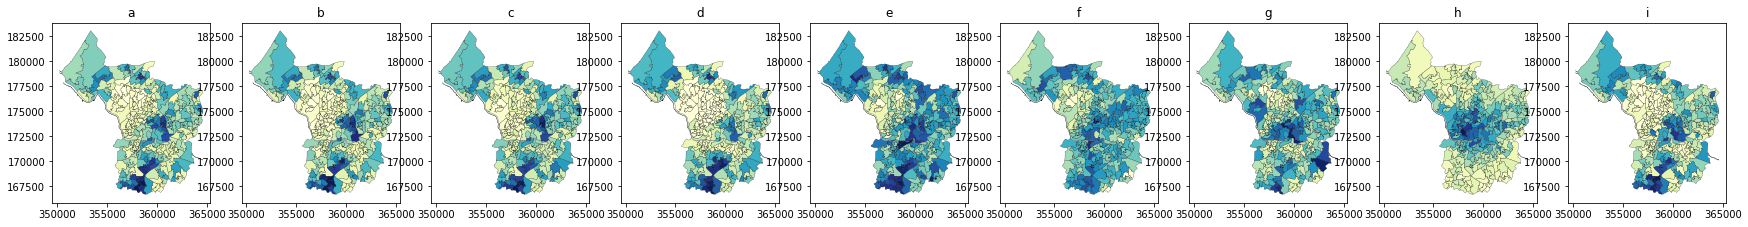

In [8]:
fig, (axs) = plt.subplots(ncols=len(col_list), nrows=1, figsize=(30, 20))

for i in range(len(col_list)):
    data_lsoa.join(data_imd)\
         .join(data_cen, how = 'inner')\
         .plot(ax=axs[i],
               column=col_list[i], 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black', 
               legend=False)\
         .set_title(col_list[i])

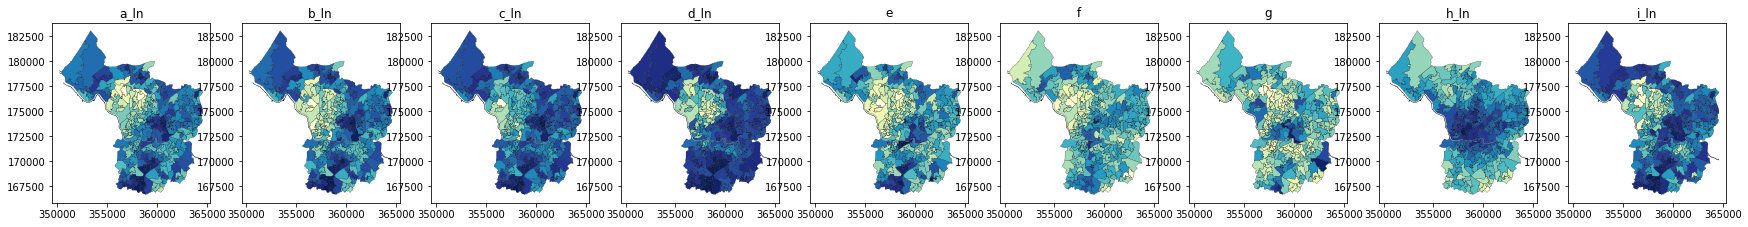

In [9]:
fig, (axs) = plt.subplots(ncols=len(col_list_2), nrows=1, figsize=(30, 20))

for i in range(len(col_list_2)):
    data_lsoa.join(data_imd)\
         .join(data_cen, how = 'inner')\
         .plot(ax=axs[i],
               column=col_list_2[i], 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black', 
               legend=False)\
         .set_title(col_list_2[i])

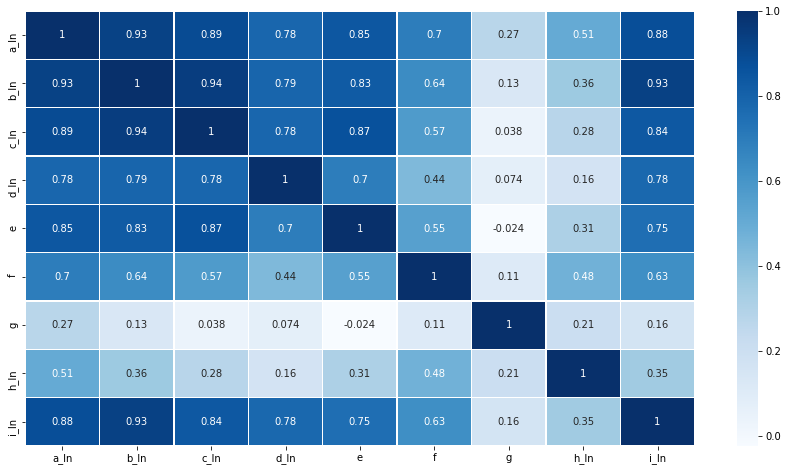

In [10]:
plt.subplots(figsize=(15,8))
sns.heatmap(data_imd[col_list_2].corr(), annot=True, cmap='Blues', linewidths=.5)
plt.show()

# CO2

In [11]:
col_co2 = data_co2.columns.to_list()

In [12]:
col_FoodDrink = col_co2[:39]
col_AlcTab = col_co2[39:45]
col_clothes = col_co2[45:57]
col_clothes.append(col_co2[127])
col_housing = col_co2[57:60]
col_energy = col_co2[60:64]
col_furniture = col_co2[64:73]
col_health = col_co2[73:76]
col_transport = col_co2[76:87]
col_communication = col_co2[87:91]
col_entertainment = col_co2[91:110]
col_travel = col_co2[110:112]
col_travel.append(col_co2[119])
col_travel.append(col_co2[120])
col_travel.append(col_co2[132])
col_education = col_co2[112:114]
col_hospitality = col_co2[114:119]
col_other = col_co2[133:-7]
col_other.append(col_co2[121])
col_toiletries = col_co2[122:127]
col_InsuranceProtection = col_co2[128:132]


cat_list = [col_AlcTab, col_clothes, col_housing, col_energy, col_furniture, col_health, col_transport, col_communication, col_entertainment, col_travel, col_education,\
            col_hospitality, col_other, col_toiletries, col_InsuranceProtection]

cat_str = ['col_AlcTab', 'col_clothes', 'col_housing', 'col_energy', 'col_furniture', 'col_health', 'col_transport', 'col_communication', 'col_entertainment', 'col_travel', 'col_education',\
           'col_hospitality', 'col_other', 'col_toiletries', 'col_InsuranceProtection']

In [13]:
for i in range(len(cat_list)):
    data_co2[cat_str[i]] = data_co2[cat_list[i]].sum(axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000148DCE267F0>,
      dtype=object)

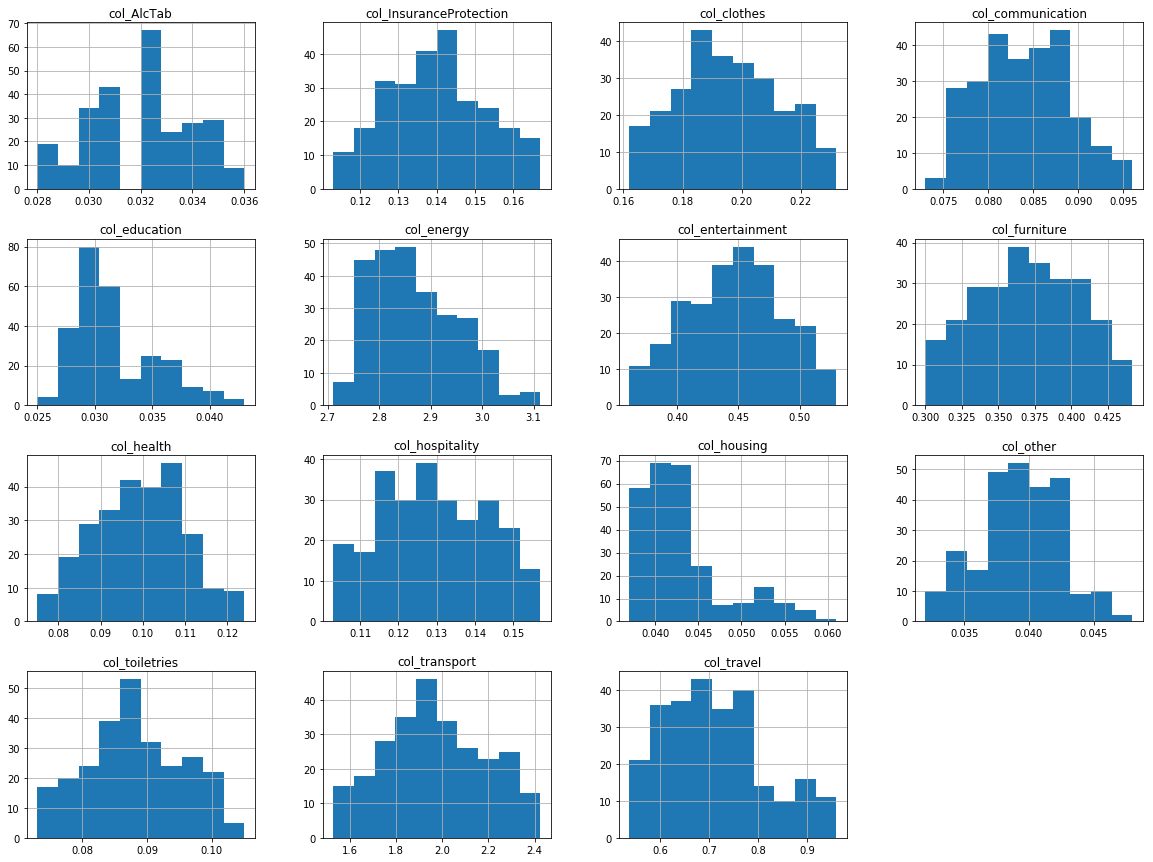

In [14]:
data_co2[cat_str].hist(figsize=(20,15))

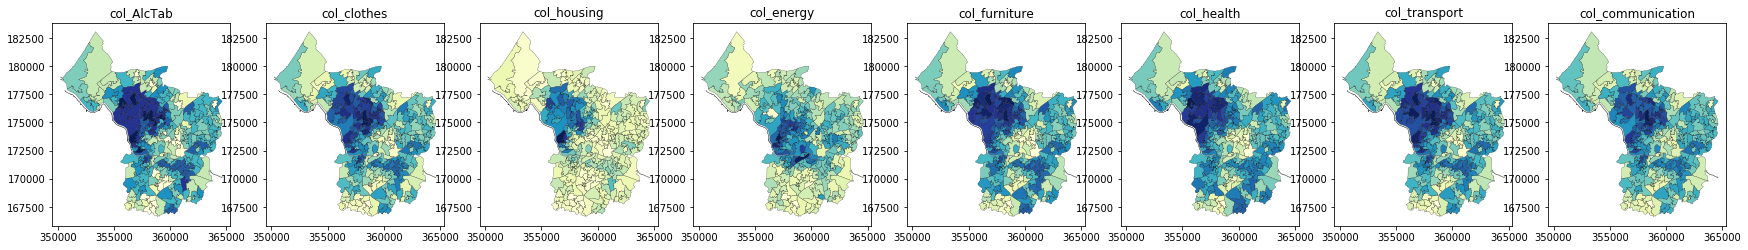

In [15]:
fig, (axs) = plt.subplots(ncols=int((len(cat_str)+1)/2), nrows=1, figsize=(30, 8))

for i in range(0, int((len(cat_str)+1)/2)):
    data_lsoa.join(data_co2[cat_str], how = 'inner')\
             .plot(ax=axs[i],
                   column=cat_str[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(cat_str[i])

In [16]:
summary_co2 = data_co2.drop('TOTAL', axis = 1).describe().loc[['mean', 'std', 'min', 'max']].T
summary_co2['range'] = summary_co2['max'] - summary_co2['min']
summary_co2.T[cat_str].T.sort_values('range', ascending=False)

mean       std    min    max  range
col_transport            1.974624  0.221818  1.528  2.425  0.897
col_travel               0.713544  0.102598  0.538  0.959  0.421
col_energy               2.868977  0.083785  2.711  3.113  0.402
col_entertainment        0.447000  0.039360  0.361  0.530  0.169
col_furniture            0.369681  0.035177  0.300  0.442  0.142
col_clothes              0.194989  0.017335  0.162  0.232  0.070
col_InsuranceProtection  0.139646  0.012717  0.113  0.167  0.054
col_hospitality          0.129247  0.013653  0.103  0.157  0.054
col_health               0.099392  0.010791  0.075  0.124  0.049
col_toiletries           0.088300  0.007349  0.073  0.105  0.032
col_housing              0.043053  0.004882  0.037  0.061  0.024
col_communication        0.084042  0.004976  0.073  0.096  0.023
col_education            0.031620  0.003536  0.025  0.043  0.018
col_other                0.039376  0.003155  0.032  0.048  0.016
col_AlcTab               0.031947  0.002061  0.028  0.036  0.008

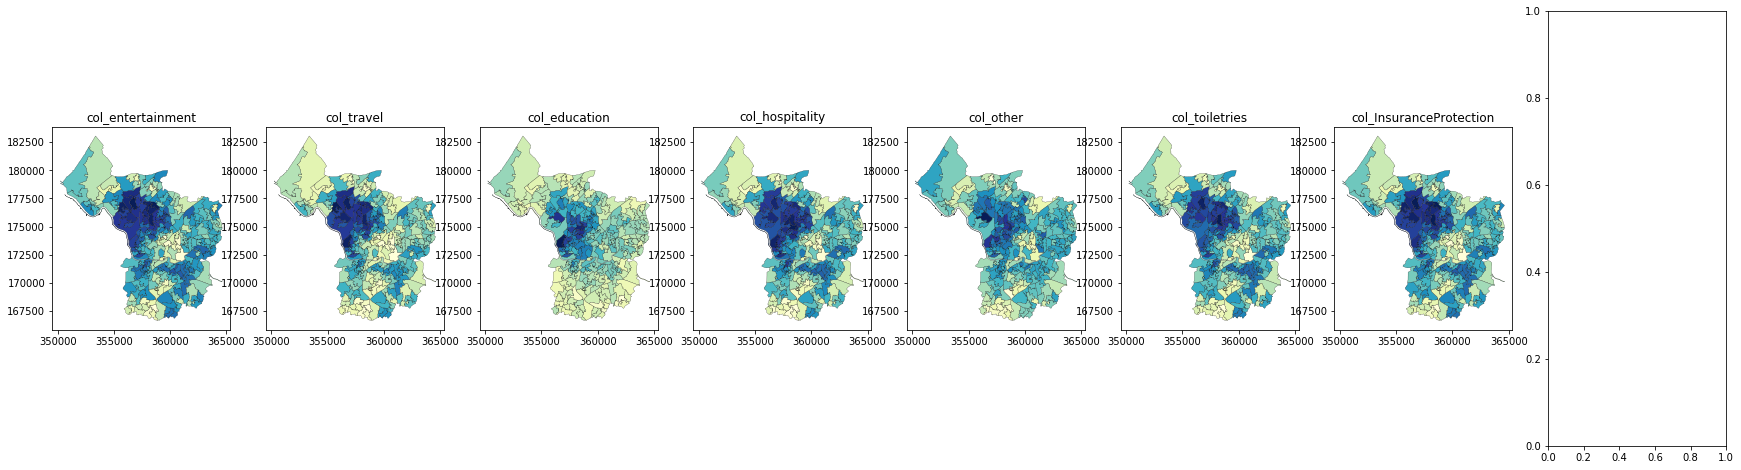

In [17]:
a = (len(cat_str) - int(len(cat_str)/2))

fig, (axs) = plt.subplots(ncols=a, nrows=1, figsize=(30, 8))

for i in range(a, len(cat_str)):
    data_lsoa.join(data_co2[cat_str], how = 'inner')\
             .plot(ax=axs[i-a],
                   column=cat_str[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(cat_str[i])

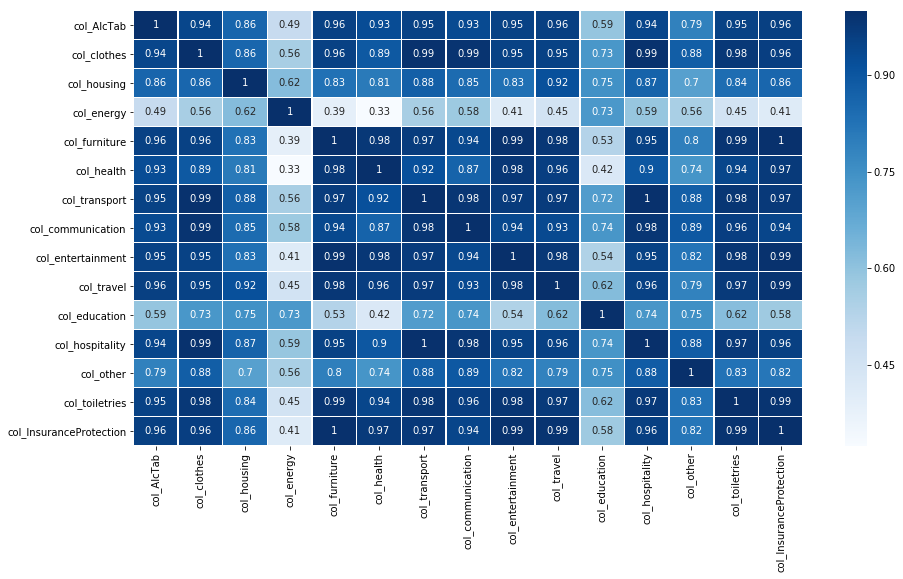

In [18]:
plt.subplots(figsize=(15,8))
sns.heatmap(data_co2[cat_str].corr(), annot=True, cmap='Blues', linewidths=.5)
plt.show()

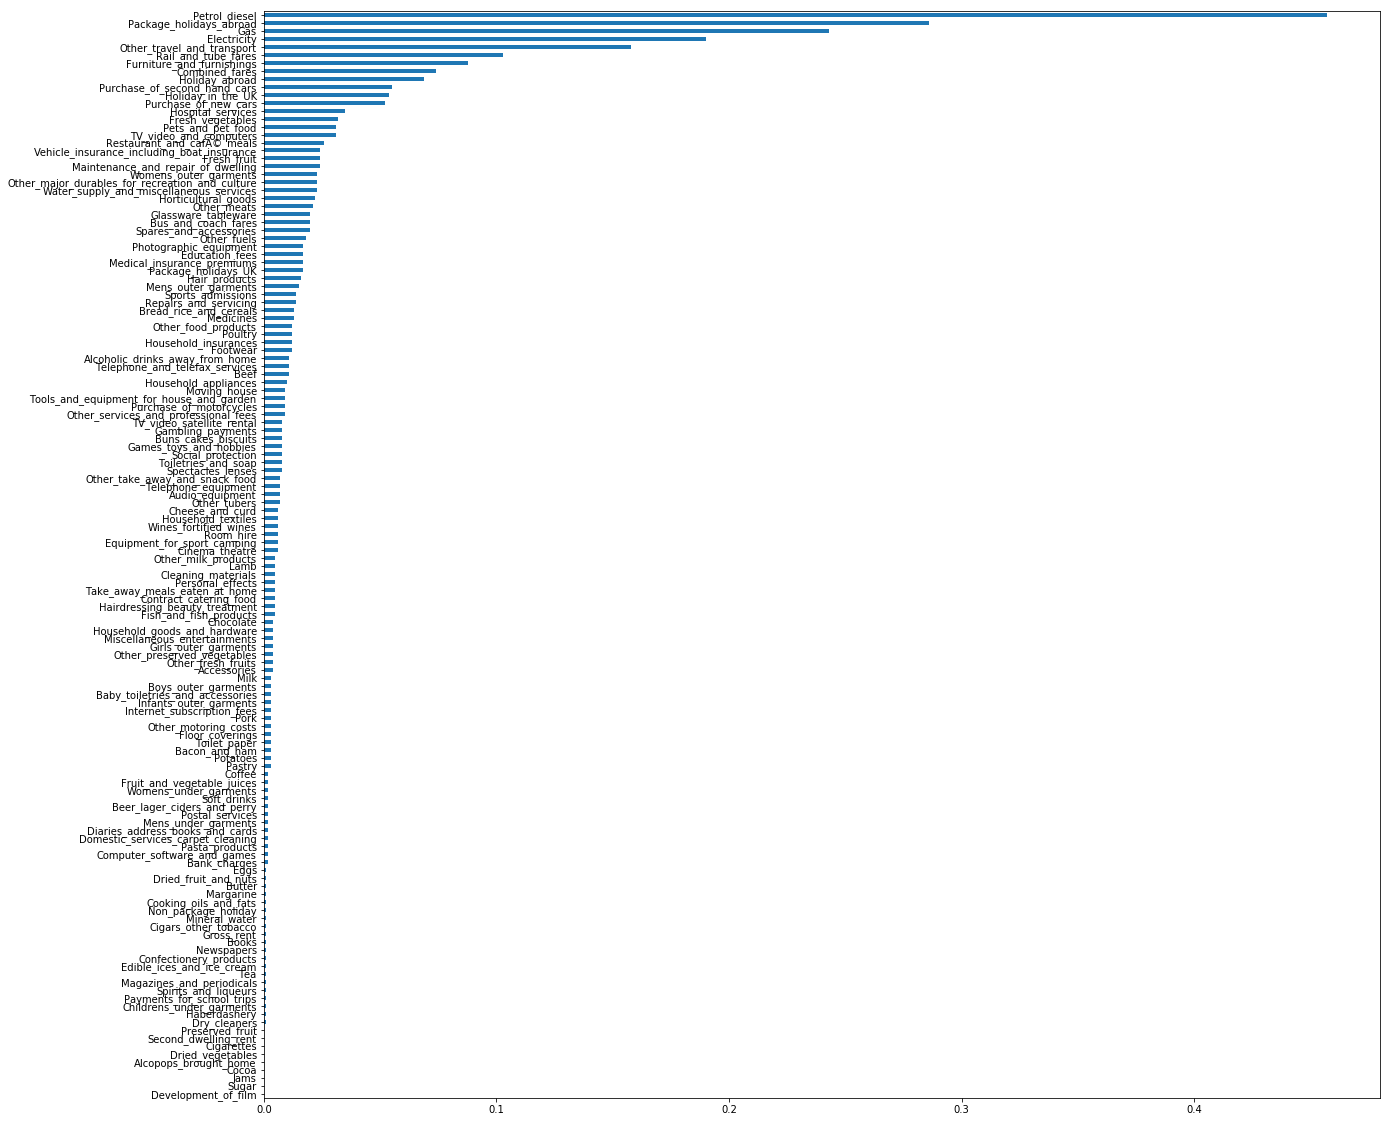

In [19]:
summary_co2.drop(cat_str)['range'].sort_values().plot(kind='barh', figsize=(20, 20))

In [20]:
range_sorted = summary_co2.drop(cat_str).sort_values('range', ascending=False).index.to_list()

In [21]:
data_co2[range_sorted[:10]].corr()

Petrol_diesel  Package_holidays_abroad  \
Petrol_diesel                      1.000000                 0.947626   
Package_holidays_abroad            0.947626                 1.000000   
Gas                                0.646561                 0.595537   
Electricity                        0.252846                 0.130338   
Other_travel_and_transport         0.941990                 0.971702   
Rail_and_tube_fares                0.852762                 0.920551   
Furniture_and_furnishings          0.967912                 0.987634   
Combined_fares                     0.878639                 0.894503   
Holiday_abroad                     0.883735                 0.970758   
Purchase_of_second_hand_cars       0.997463                 0.944523   

                                   Gas  Electricity  \
Petrol_diesel                 0.646561     0.252846   
Package_holidays_abroad       0.595537     0.130338   
Gas                           1.000000     0.853753   
Electricity                   0.853753     1.000000   
Other_travel_and_transport    0.689226     0.276210   
Rail_and_tube_fares           0.698212     0.339455   
Furniture_and_furnishings     0.553551     0.090820   
Combined_fares                0.715302     0.406770   
Holiday_abroad                0.650794     0.211343   
Purchase_of_second_hand_cars  0.661908     0.277965   

                              Other_travel_and_transport  Rail_and_tube_fares  \
Petrol_diesel                                   0.941990             0.852762   
Package_holidays_abroad                         0.971702             0.920551   
Gas                                             0.689226             0.698212   
Electricity                                     0.276210             0.339455   
Other_travel_and_transport                      1.000000             0.964047   
Rail_and_tube_fares                             0.964047             1.000000   
Furniture_and_furnishings                       0.945402             0.866651   
Combined_fares                                  0.930023             0.969087   
Holiday_abroad                                  0.981782             0.969107   
Purchase_of_second_hand_cars                    0.951825             0.869361   

                              Furniture_and_furnishings  Combined_fares  \
Petrol_diesel                                  0.967912        0.878639   
Package_holidays_abroad                        0.987634        0.894503   
Gas                                            0.553551        0.715302   
Electricity                                    0.090820        0.406770   
Other_travel_and_transport                     0.945402        0.930023   
Rail_and_tube_fares                            0.866651        0.969087   
Furniture_and_furnishings                      1.000000        0.861674   
Combined_fares                                 0.861674        1.000000   
Holiday_abroad                                 0.926452        0.912261   
Purchase_of_second_hand_cars                   0.959405        0.893279   

                              Holiday_abroad  Purchase_of_second_hand_cars  
Petrol_diesel                       0.883735                      0.997463  
Package_holidays_abroad             0.970758                      0.944523  
Gas                                 0.650794                      0.661908  
Electricity                         0.211343                      0.277965  
Other_travel_and_transport          0.981782                      0.951825  
Rail_and_tube_fares                 0.969107                      0.869361  
Furniture_and_furnishings           0.926452                      0.959405  
Combined_fares                      0.912261                      0.893279  
Holiday_abroad                      1.000000                      0.892904  
Purchase_of_second_hand_cars        0.892904                      1.000000

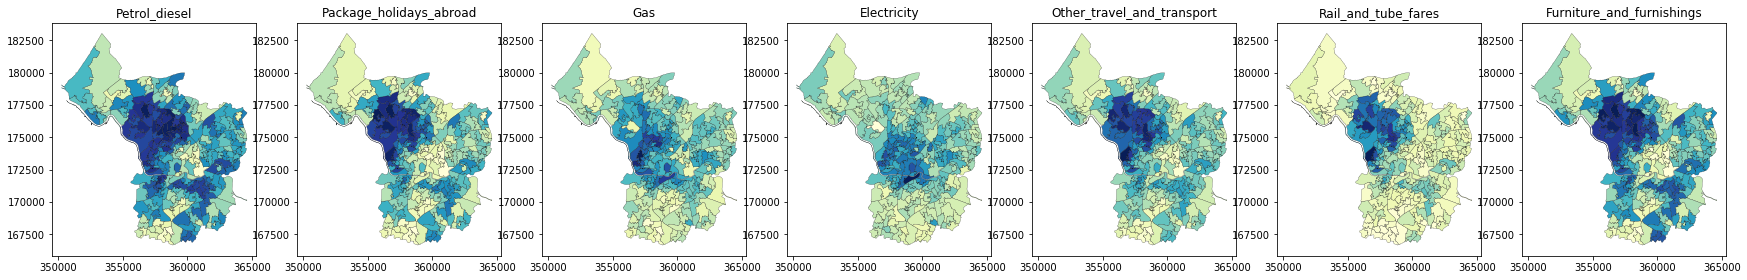

In [22]:
a = range_sorted[:7]

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 8))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(a[i])

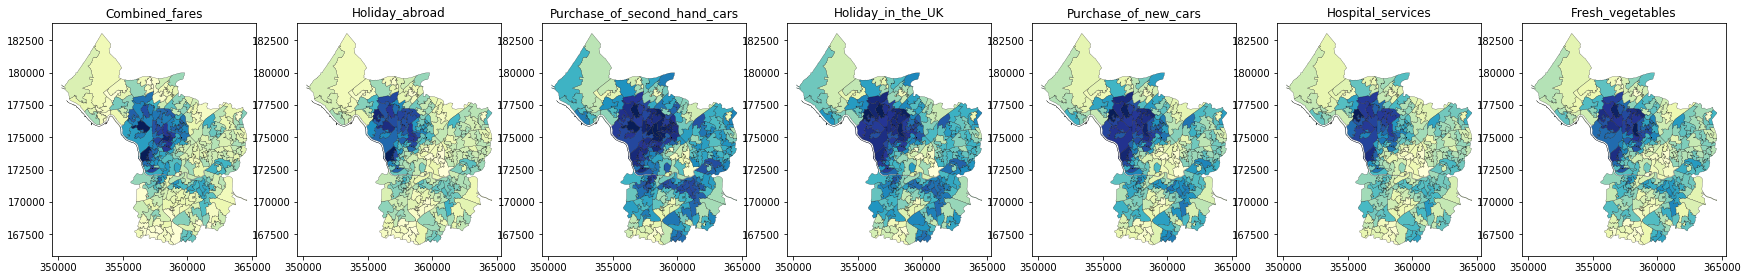

In [23]:
a = range_sorted[7:14]

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 8))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(a[i])

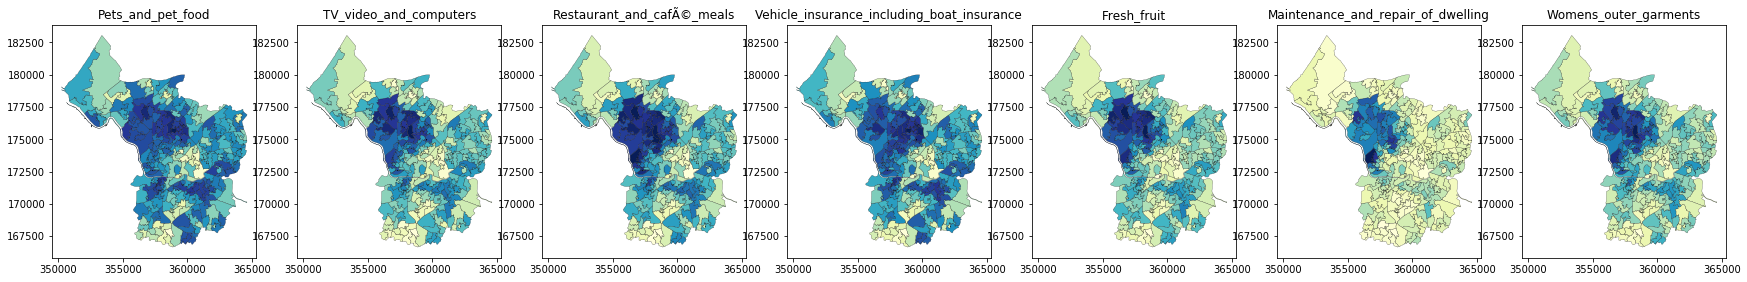

In [24]:
a = range_sorted[14:21]

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 8))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(a[i])

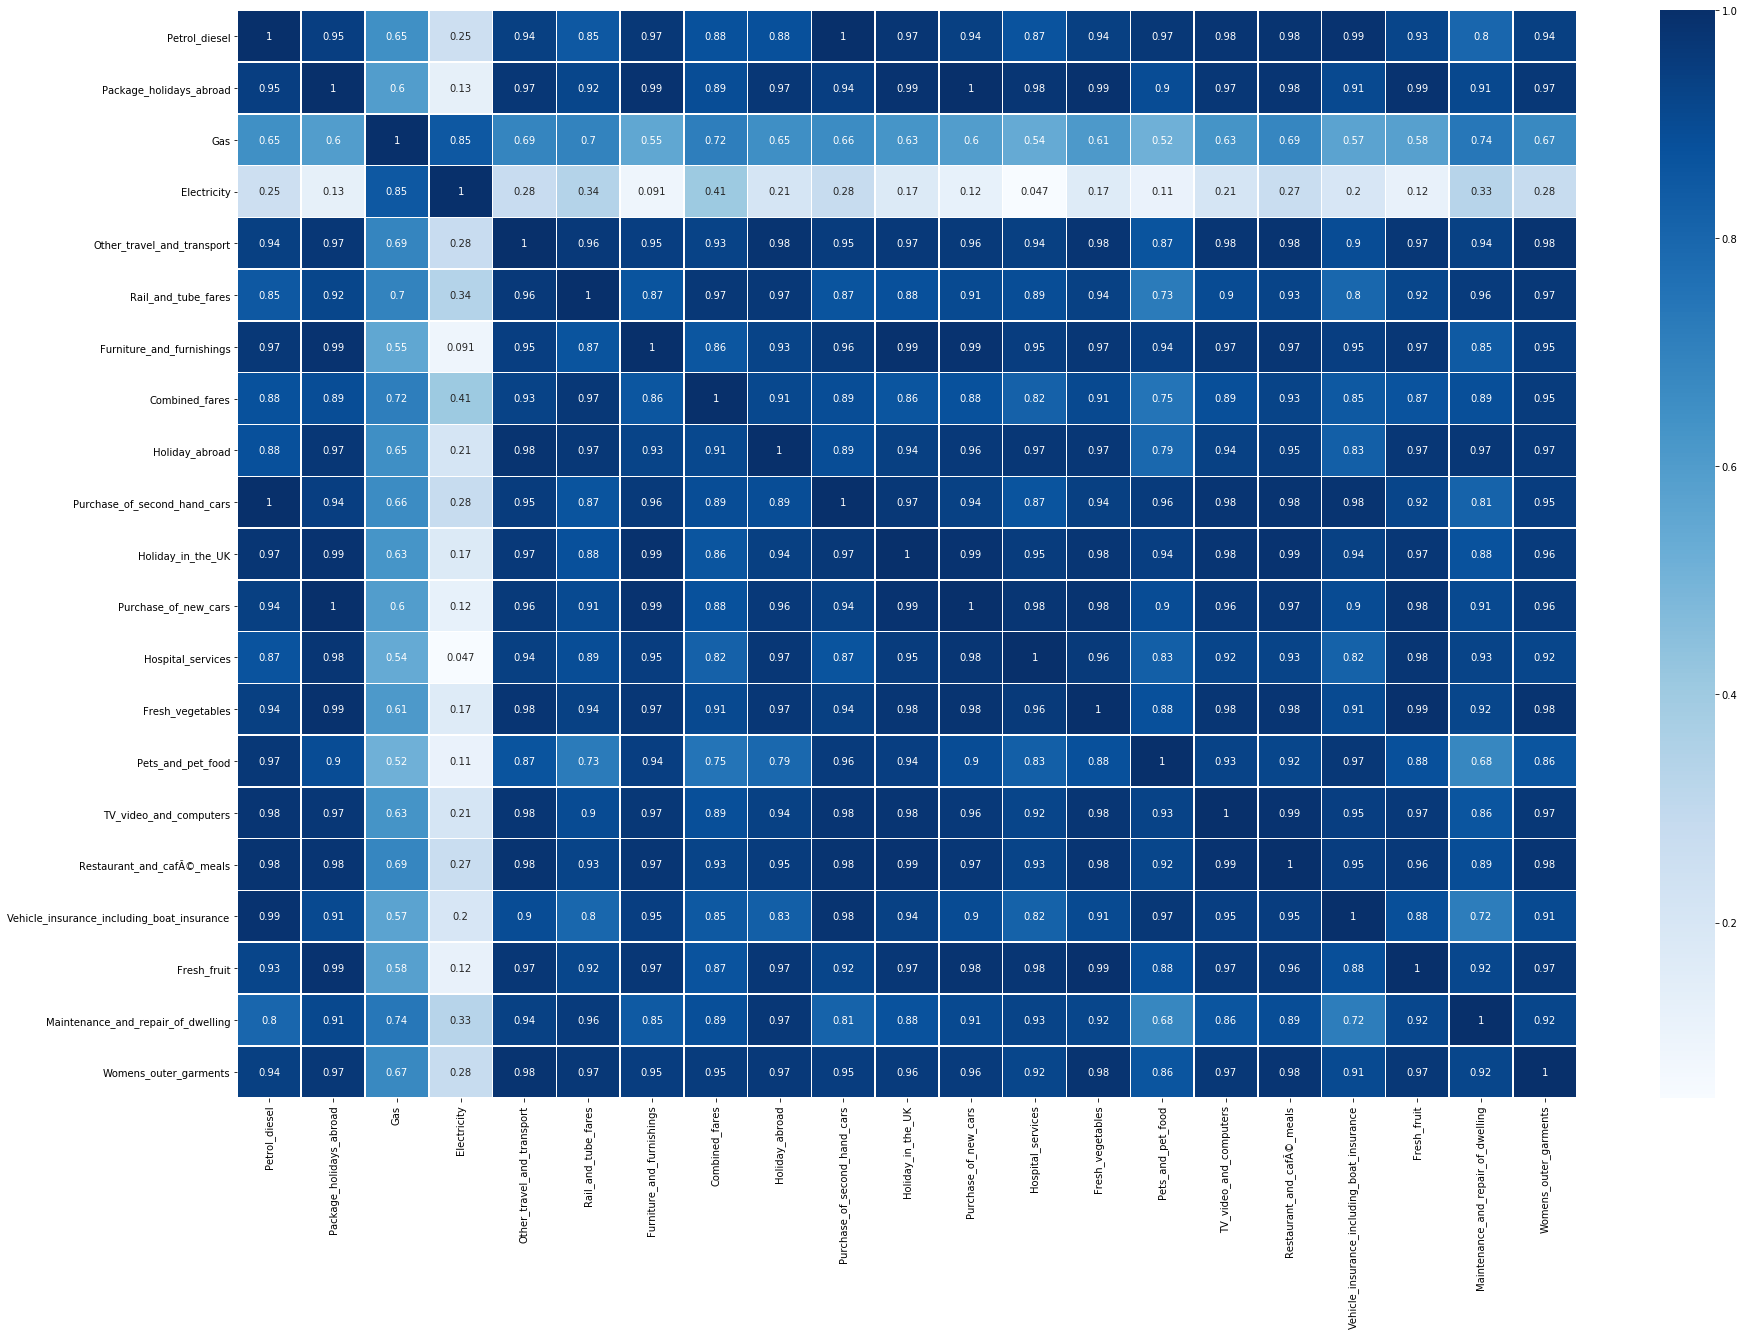

In [25]:
plt.subplots(figsize=(30, 20))
sns.heatmap(data_co2[range_sorted[:21]].corr(), annot=True, cmap='Blues', linewidths=.5)
plt.show()

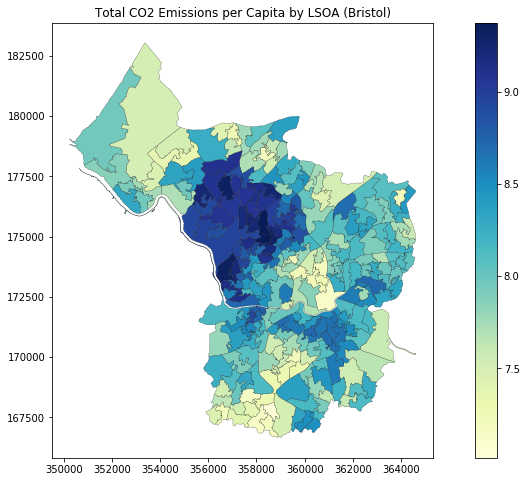

In [26]:
fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

data_lsoa.join(data_co2, how='right')\
         .plot(ax=ax,
               column='TOTAL', 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black', 
               legend=True)\
         .set_title("Total CO2 Emissions per Capita by LSOA (Bristol)")

plt.savefig('Outputs/total_co2.png')

In [27]:
summary_co2.T[col_FoodDrink].T.sort_values('range', ascending=False)

mean           std    min    max  range
Fresh_vegetables            0.115521  7.461257e-03  0.103  0.135  0.032
Fresh_fruit                 0.099783  5.471873e-03  0.090  0.114  0.024
Other_meats                 0.132502  4.936138e-03  0.121  0.142  0.021
Bread_rice_and_cereals      0.061806  2.958434e-03  0.056  0.069  0.013
Other_food_products         0.048281  2.534629e-03  0.043  0.055  0.012
Poultry                     0.049027  3.144615e-03  0.043  0.055  0.012
Beef                        0.040821  2.528163e-03  0.036  0.047  0.011
Buns_cakes_biscuits         0.043125  1.774350e-03  0.039  0.047  0.008
Other_tubers                0.036688  1.582868e-03  0.033  0.040  0.007
Cheese_and_curd             0.023312  1.425549e-03  0.021  0.027  0.006
Lamb                        0.014110  8.905832e-04  0.012  0.017  0.005
Other_milk_products         0.025574  1.331223e-03  0.023  0.028  0.005
Fish_and_fish_products      0.018924  1.217680e-03  0.017  0.022  0.005
Chocolate                   0.014840  8.937714e-04  0.013  0.017  0.004
Other_preserved_vegetables  0.013703  1.099734e-03  0.012  0.016  0.004
Other_fresh_fruits          0.010768  7.174268e-04  0.009  0.013  0.004
Milk                        0.027483  6.229486e-04  0.026  0.029  0.003
Pork                        0.014544  5.499728e-04  0.013  0.016  0.003
Potatoes                    0.019730  6.355640e-04  0.018  0.021  0.003
Bacon_and_ham               0.020605  7.884532e-04  0.019  0.022  0.003
Pastry                      0.010700  6.803400e-04  0.009  0.012  0.003
Coffee                      0.007928  5.155127e-04  0.007  0.009  0.002
Soft_drinks                 0.009000  5.989813e-04  0.008  0.010  0.002
Pasta_products              0.004951  3.289900e-04  0.004  0.006  0.002
Fruit_and_vegetable_juices  0.006943  6.057753e-04  0.006  0.008  0.002
Eggs                        0.008106  3.090185e-04  0.008  0.009  0.001
Confectionery_products      0.005407  4.921819e-04  0.005  0.006  0.001
Mineral_water               0.001757  4.299204e-04  0.001  0.002  0.001
Tea                         0.004308  4.625404e-04  0.004  0.005  0.001
Edible_ices_and_ice_cream   0.005871  3.361466e-04  0.005  0.006  0.001
Margarine                   0.005578  4.948286e-04  0.005  0.006  0.001
Cooking_oils_and_fats       0.004095  2.938529e-04  0.004  0.005  0.001
Dried_fruit_and_nuts        0.005361  4.812690e-04  0.005  0.006  0.001
Butter                      0.005433  4.964975e-04  0.005  0.006  0.001
Jams                        0.002000  4.345077e-19  0.002  0.002  0.000
Dried_vegetables            0.000000  0.000000e+00  0.000  0.000  0.000
Preserved_fruit             0.001000  2.172539e-19  0.001  0.001  0.000
Cocoa                       0.001000  2.172539e-19  0.001  0.001  0.000
Sugar                       0.003000  0.000000e+00  0.003  0.003  0.000

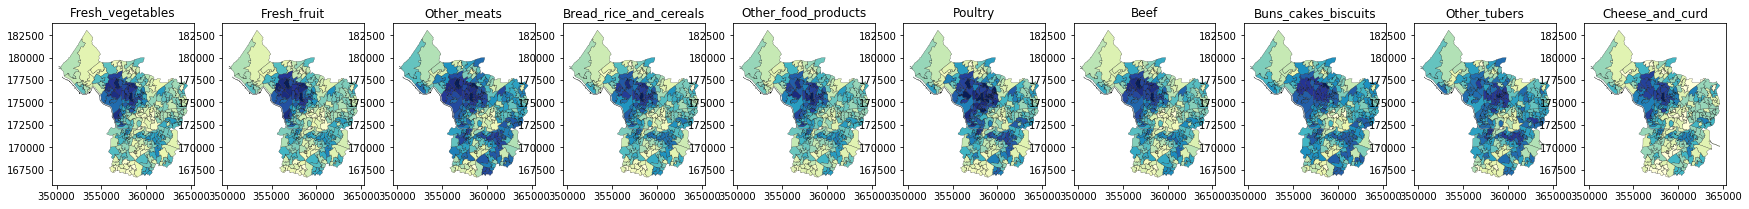

In [28]:
a = summary_co2.T[col_FoodDrink].T.sort_values('range', ascending=False).index.to_list()[:10]

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 8))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(a[i])

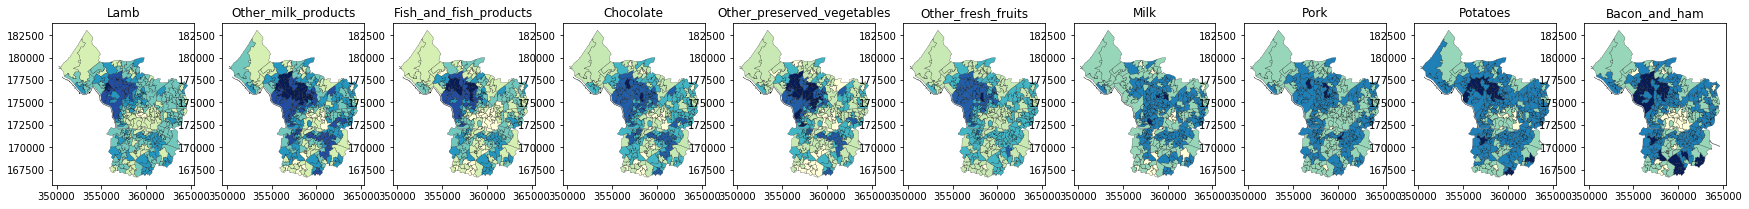

In [29]:
a = summary_co2.T[col_FoodDrink].T.sort_values('range', ascending=False).index.to_list()[10:20]

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 8))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(a[i])

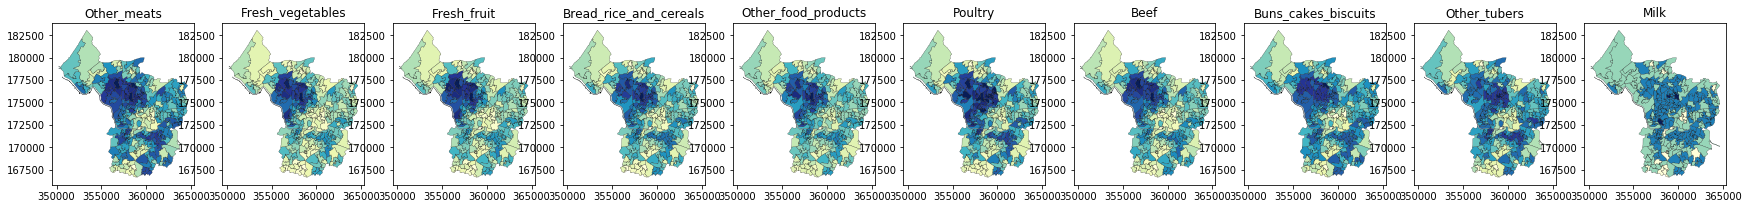

In [30]:
a = summary_co2.T[col_FoodDrink].T.sort_values('max', ascending=False).index.to_list()[:10]

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 8))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(a[i])

In [31]:
top_list = summary_co2.T[col_FoodDrink].T.sort_values('max', ascending=False).index.to_list()[:10]
for item in summary_co2.T[col_FoodDrink].T.sort_values('range', ascending=False).index.to_list()[:10]:
    if item not in top_list:
        top_list.append(item)
        
top_list

['Other_meats',
 'Fresh_vegetables',
 'Fresh_fruit',
 'Bread_rice_and_cereals',
 'Other_food_products',
 'Poultry',
 'Beef',
 'Buns_cakes_biscuits',
 'Other_tubers',
 'Milk',
 'Cheese_and_curd']

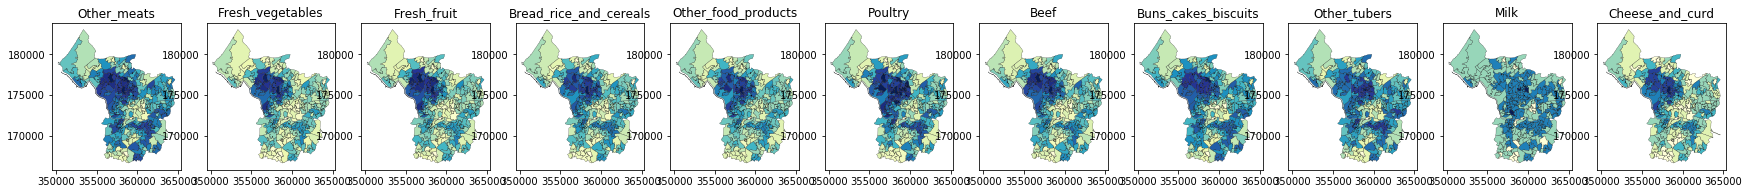

In [32]:
a = top_list

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 8))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(a[i])

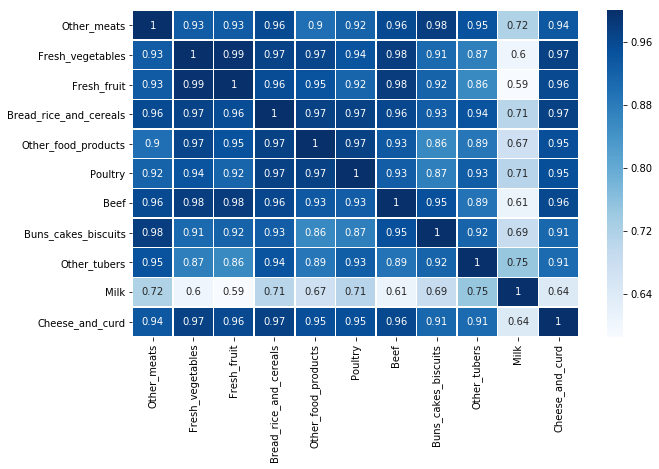

In [33]:
plt.subplots(figsize=(10, 6))
sns.heatmap(data_co2[top_list].corr(), annot=True, cmap='Blues', linewidths=.5)
plt.show()

In [34]:
'''
plt.subplots(figsize=(30, 20))
sns.heatmap(data_co2[summary_co2.T[col_FoodDrink].T.sort_values('range', ascending=False).index.to_list()].corr(), annot=True, cmap='Blues', linewidths=.5)
plt.show()
'''

"\nplt.subplots(figsize=(30, 20))\nsns.heatmap(data_co2[summary_co2.T[col_FoodDrink].T.sort_values('range', ascending=False).index.to_list()].corr(), annot=True, cmap='Blues', linewidths=.5)\nplt.show()\n"

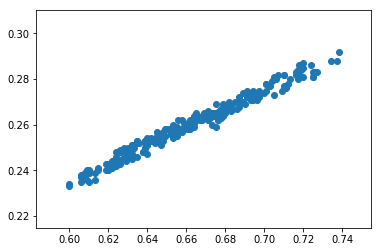

In [35]:
perishable_tup = itemgetter(4,5,6,7,8,9,10,11,12,13,14,15,16,18,20,22,25,26)(summary_co2.T[col_FoodDrink].columns.to_list())
non_perishable = [] 
perishable = []

for item in summary_co2.T[col_FoodDrink].columns.to_list():
    if item not in perishable_tup:
        non_perishable.append(item)
    else:
        perishable.append(item)
        
data_co2['tot_perishable'] = data_co2[perishable].sum(axis=1)
data_co2['tot_nonperishable'] = data_co2[non_perishable].sum(axis=1)
plt.scatter(data_co2['tot_perishable'], data_co2['tot_nonperishable'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000148E523A080>,
      dtype=object)

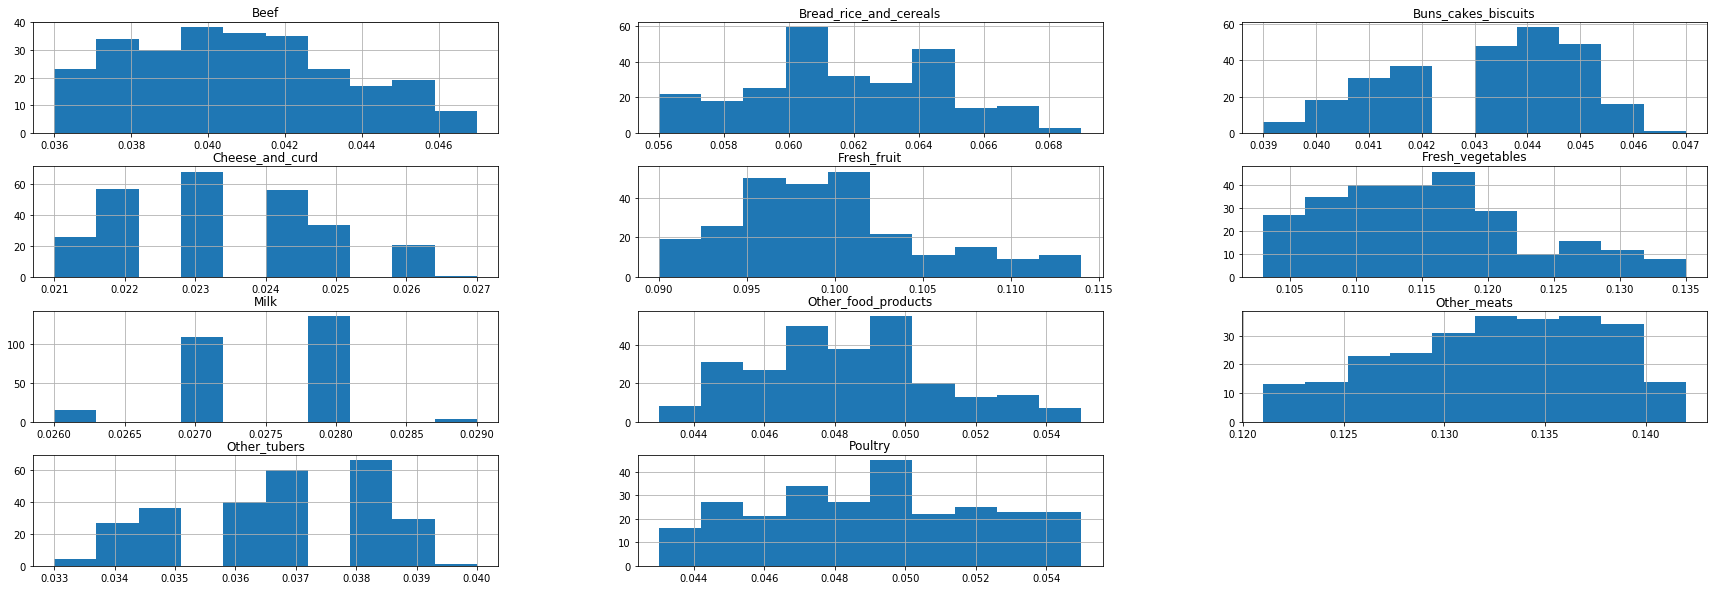

In [36]:
data_co2[top_list].hist(figsize = (30,10))

In [37]:
grains = summary_co2.T[col_FoodDrink].columns.to_list()[:4]
meat = summary_co2.T[col_FoodDrink].columns.to_list()[4:11]
dairy_eggs = summary_co2.T[col_FoodDrink].columns.to_list()[11:16]
fats = summary_co2.T[col_FoodDrink].columns.to_list()[16:18]
fruit_veg = summary_co2.T[col_FoodDrink].columns.to_list()[18:27]
sweets_other = summary_co2.T[col_FoodDrink].columns.to_list()[27:33]
drinks_nonalc = summary_co2.T[col_FoodDrink].columns.to_list()[33:]

In [38]:
col_list = [fruit_veg, meat, grains, dairy_eggs, sweets_other, drinks_nonalc, fats]
str_list = ['fruit_veg', 'meat', 'grains', 'dairy_eggs', 'sweets_other', 'drinks_nonalc', 'fats']
tot_list = []

for i in range(len(col_list)):
    data_co2[str('total_' + str_list[i])] = data_co2[col_list[i]].sum(axis=1)
    tot_list.append(str('total_' + str_list[i]))

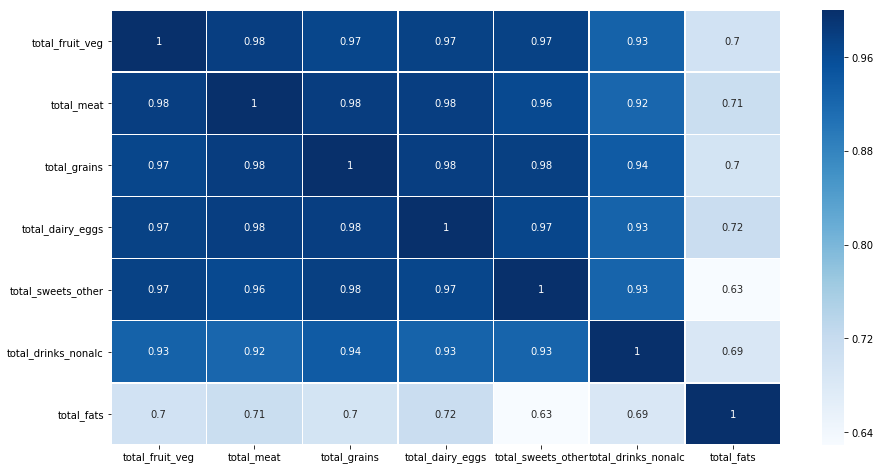

In [39]:
plt.subplots(figsize=(15,8))
sns.heatmap(data_co2[tot_list].corr(), annot=True, cmap='Blues', linewidths=.5)
plt.show()
# really high co-variance --> likely because does not control for AMOUNT actually consumed, only spending data

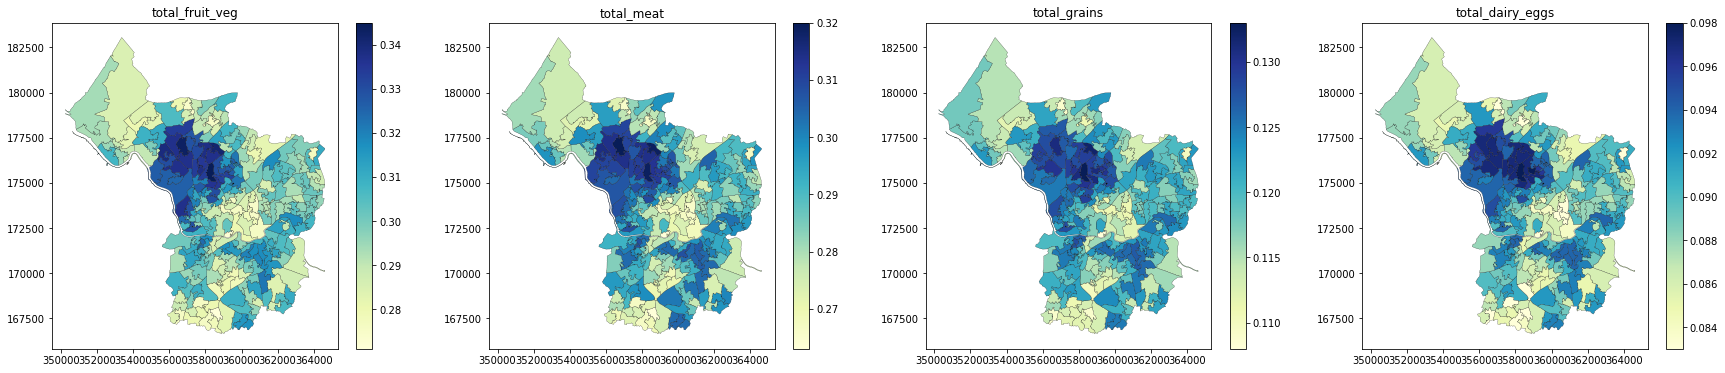

In [40]:
a = tot_list[:4]

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 6))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   legend=True
                  )\
             .set_title(a[i])

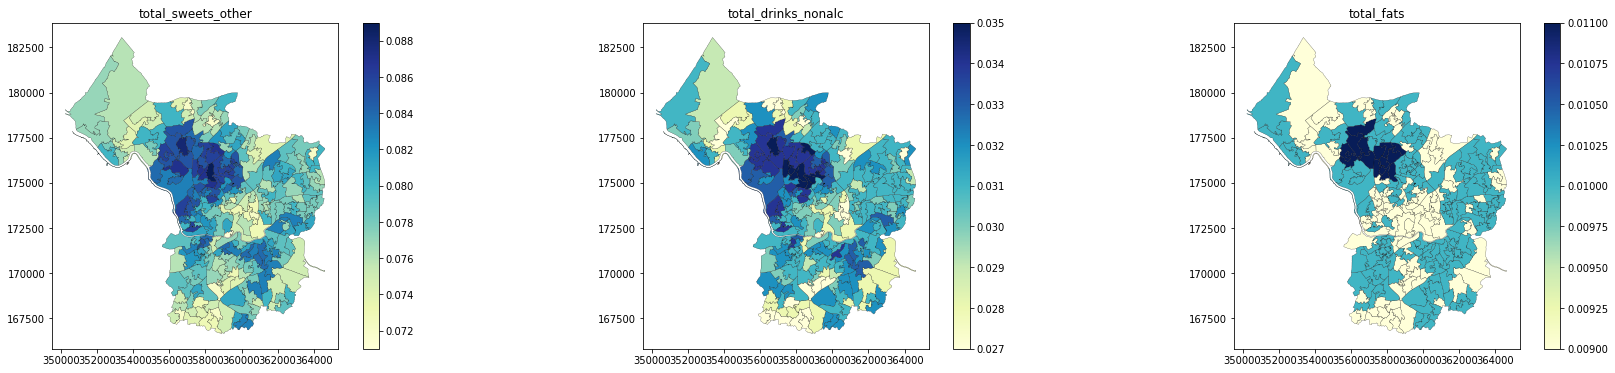

In [41]:
a = tot_list[4:]

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 6))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   legend=True
                  )\
             .set_title(a[i])

In [42]:
# Scale the data to fit between 0 and 1. This will be useful for the K-Means analysis, as euclidian distance is used. 

min_max_scaler = preprocessing.MinMaxScaler()
data_mm = pd.DataFrame(min_max_scaler.fit_transform(data_co2[tot_list]))
data_mm.index = data_co2[tot_list].index

to_keep = data_co2[tot_list].columns.to_list()
to_keep_mm = []
for var in to_keep:
    to_keep_mm.append(var + '_mm')
data_mm.columns = to_keep_mm

to_keep_mm2 = to_keep_mm[4:]
to_keep_mm2.append(to_keep_mm[0])
to_keep_mm2.append(to_keep_mm[1])
to_keep_mm2.append(to_keep_mm[2])

data_food_tot = data_co2[tot_list].join(data_mm)[to_keep_mm2]

data_food_tot.head()

total_sweets_other_mm  total_drinks_nonalc_mm  total_fats_mm  \
LSOA                                                                      
E01014485               0.444444                   0.500            0.5   
E01014486               0.333333                   0.375            0.0   
E01014487               0.722222                   0.625            0.5   
E01014488               0.611111                   0.625            0.0   
E01014489               0.444444                   0.500            0.5   

           total_fruit_veg_mm  total_meat_mm  total_grains_mm  
LSOA                                                           
E01014485            0.405405       0.473684             0.52  
E01014486            0.256757       0.298246             0.36  
E01014487            0.594595       0.666667             0.68  
E01014488            0.513514       0.649123             0.64  
E01014489            0.337838       0.350877             0.48

## Transport

In [43]:
transport = data_co2.columns[76:87].to_list()
private_transport = transport[:5]
public_transport = transport[5:]

data_co2['prtr_tot'] = data_co2[private_transport].sum(axis=1)
data_co2['putr_tot'] = data_co2[public_transport].sum(axis=1)

print(private_transport, '\n', public_transport)

['Purchase_of_new_cars', 'Purchase_of_second_hand_cars', 'Purchase_of_motorcycles', 'Spares_and_accessories', 'Petrol_diesel'] 
 ['Repairs_and_servicing', 'Other_motoring_costs', 'Rail_and_tube_fares', 'Bus_and_coach_fares', 'Combined_fares', 'Other_travel_and_transport']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014889598DD8>,
      dtype=object)

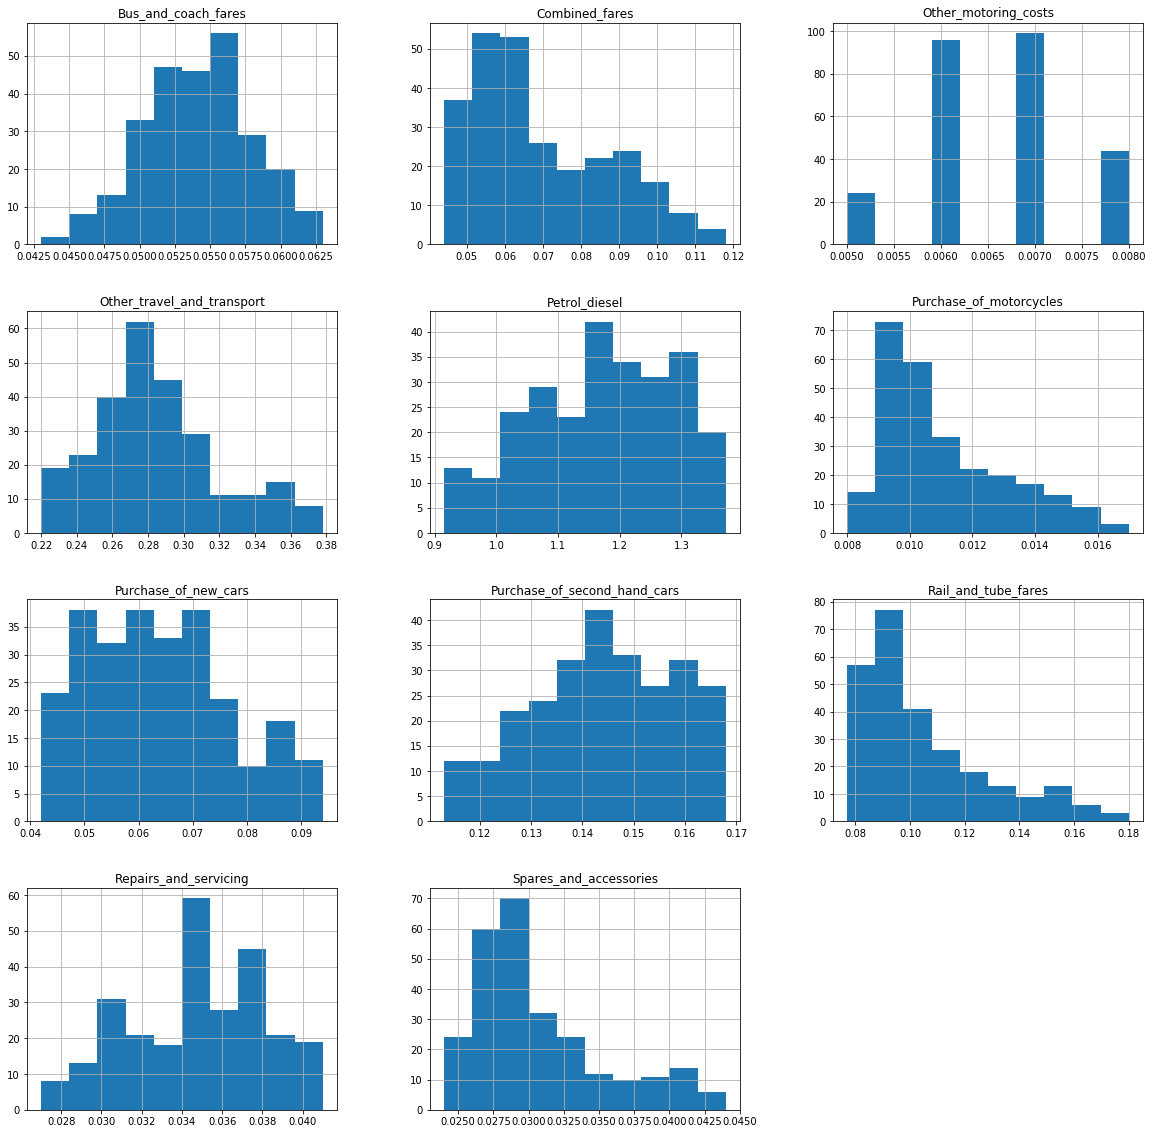

In [44]:
data_co2[transport].hist(figsize=(20,20))

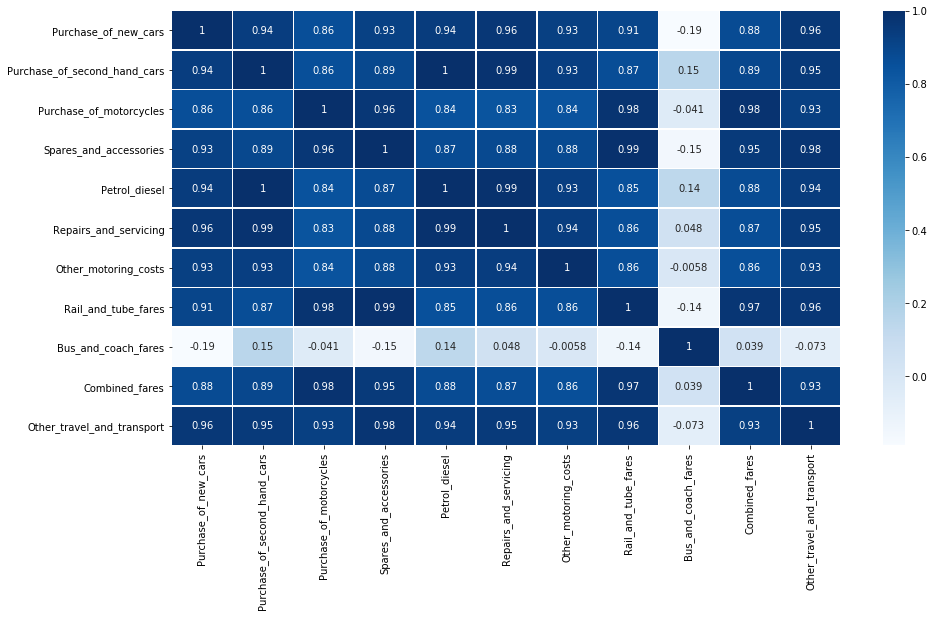

In [45]:
plt.subplots(figsize=(15,8))
sns.heatmap(data_co2[transport].corr(), annot=True, cmap='Blues', linewidths=.5)
plt.show()

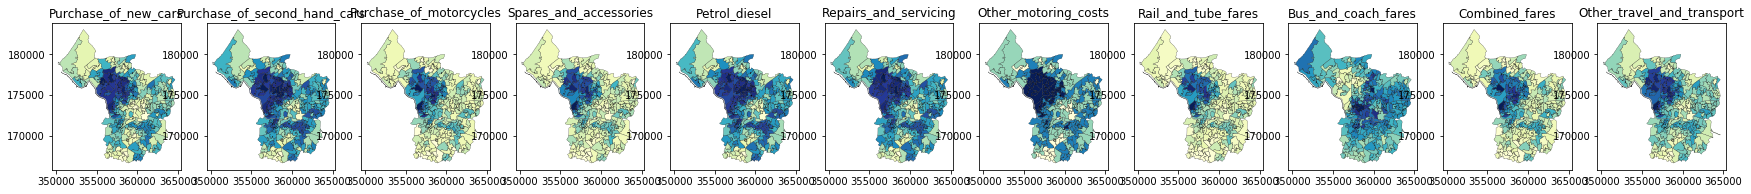

In [46]:
fig, (axs) = plt.subplots(ncols=len(transport), nrows=1, figsize=(30, 8))

for i in range(len(transport)):
    data_lsoa.join(data_co2[transport], how = 'inner')\
             .plot(ax=axs[i],
                   column=transport[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(transport[i])

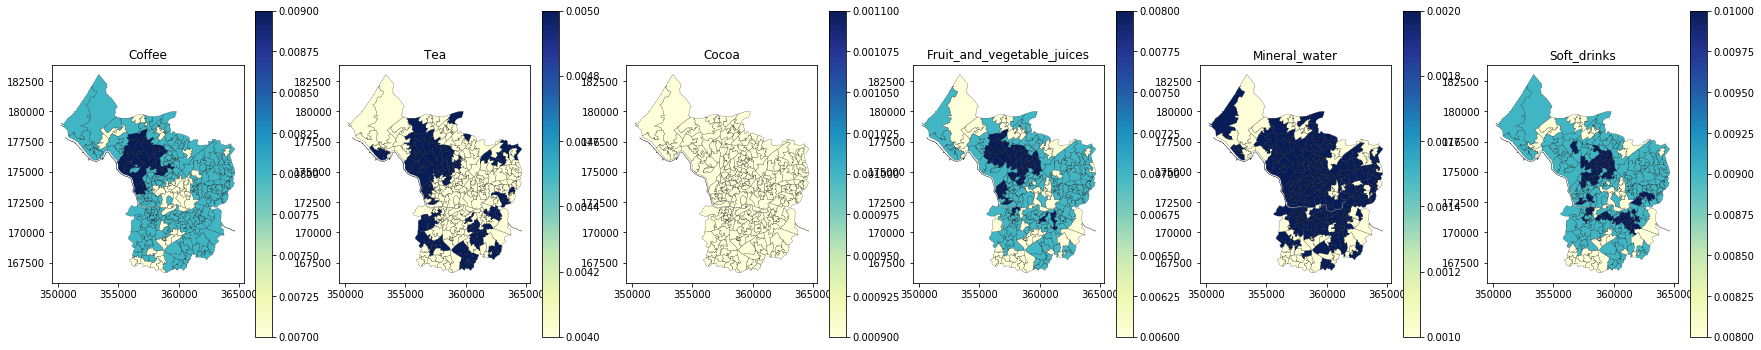

In [47]:
# grains, meat, dairy_eggs, fats, fruit_veg, sweets_other, drinks_nonalc

a = drinks_nonalc
fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 6))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   legend=True
                  )\
             .set_title(a[i])

Text(0.5, 1.0, 'Bus-related CO2 Emissions per Capita by LSOA (Bristol)')

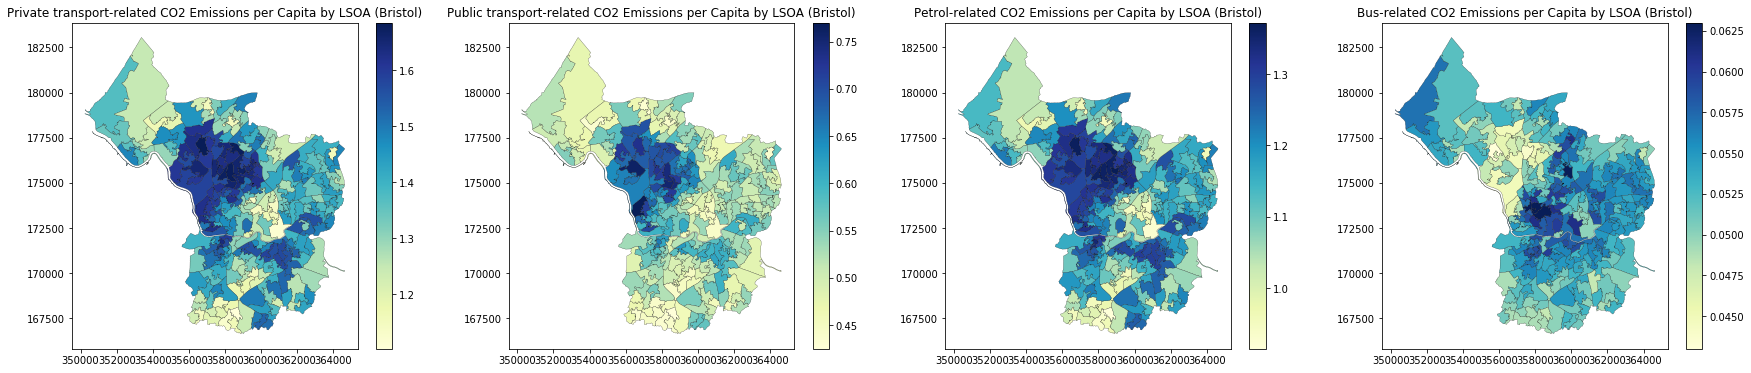

In [48]:
fig, (axs) = plt.subplots(nrows=1, ncols=4, figsize=(30, 6))

data_lsoa.join(data_co2, how='right')\
         .plot(ax=axs[0],
               column='prtr_tot', 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black', 
               legend=True
              )\
         .set_title("Private transport-related CO2 Emissions per Capita by LSOA (Bristol)")

data_lsoa.join(data_co2, how='right')\
         .plot(ax=axs[1],
               column='putr_tot', 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black', 
               legend=True
              )\
         .set_title("Public transport-related CO2 Emissions per Capita by LSOA (Bristol)")

data_lsoa.join(data_co2, how='right')\
         .plot(ax=axs[2],
               column='Petrol_diesel', 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black', 
               legend=True
              )\
         .set_title("Petrol-related CO2 Emissions per Capita by LSOA (Bristol)")

data_lsoa.join(data_co2, how='right')\
         .plot(ax=axs[3],
               column='Bus_and_coach_fares', 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black', 
               legend=True
              )\
         .set_title("Bus-related CO2 Emissions per Capita by LSOA (Bristol)")

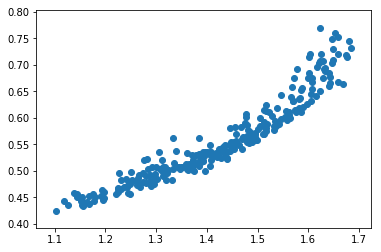

In [49]:
plt.scatter(data_co2['prtr_tot'], data_co2['putr_tot'])

# CENSUS

Text(0.5, 1.0, 'F1918')

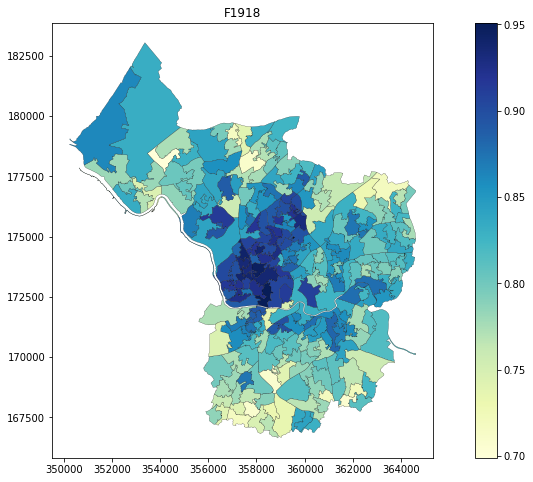

In [50]:
var = 'F1918'

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 8))
data_lsoa.join(data_cen, how='inner')\
         .plot(ax=ax,
               column=var, 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black',
               legend=True)\
         .set_title(var)

In [51]:
'''
F184: "Mean age"
F185: "Median age"
F2067: "Up to 0.5 persons per bedroom"
F2069: "Over 0.5 and up to 1.0 persons per bedroom"
F2071: "Over 1.0 and up to 1.5 persons per bedroom"
F2073: "Over 1.5 persons per bedroom"
F997: "Household is not deprived in any dimension"
F998: "Household is deprived in 1 dimension"
F999: "Household is deprived in 2 dimensions"
F1000: "Household is deprived in 3 dimensions"
F1001: "Household is deprived in 4 dimensions"
F1664: "White\ English/Welsh/Scottish/Northern Irish/British"
F1665: "White\ Irish"
F1666: "White\ Gypsy or Irish Traveller"
F1667: "White\ Other White"
F1668: "Mixed/multiple ethnic group\ White and Black Caribbean"
F1669: "Mixed/multiple ethnic group\ White and Black African"
F1670: "Mixed/multiple ethnic group\ White and Asian"
F1671: "Mixed/multiple ethnic group\ Other Mixed"
F1672: "Asian/Asian British\ Indian"
F1673: "Asian/Asian British\ Pakistani"
F1674: "Asian/Asian British\ Bangladeshi"
F1675: "Asian/Asian British\ Chinese"
F1676: "Asian/Asian British\ Other Asian"
F1677: "Black/African/Caribbean/Black British\ African"
F1678: "Black/African/Caribbean/Black British\ Caribbean"
F1679: "Black/African/Caribbean/Black British\ Other Black"
F1680: "Other ethnic group\ Arab"
F1681: "Other ethnic group\ Any other ethnic group"
F1916: "Day-to-day activities limited a lot"
F1917: "Day-to-day activities limited a little"
F1918: "Day-to-day activities not limited"
F2341: "Males"
F2342: "Females"
F1810: "One person household"
F1816: "One family only"
F1838: "Other household types\ All full-time students"
F1393: "Economically active\ Employee\ Part-time"
F1394: "Economically active\ Employee\ Full-time"
F1395: "Economically active\ Self-employed with employees\ Part-time"
F1396: "Economically active\ Self-employed with employees\ Full-time"
F1397: "Economically active\ Self-employed without employees\ Part-time"
F1398: "Economically active\ Self-employed without employees\ Full-time"
F1399: "Economically active\ Unemployed"
F1402: "Economically inactive\ Retired"
F1403: "Economically inactive\ Student (including full-time students)"
F1404: "Economically inactive\ Looking after home or family"
F1405: "Economically inactive\ Long-term sick or disabled"
F1406: "Economically inactive\ Other"
F1875: "Average household size (persons per household)"
F884: "Born in the UK"
F2147: "Average number of rooms per household"
F359631: "1. Higher managerial; administrative and professional occupations"
F359633: "2. Lower managerial; administrative and professional occupations"
F359635: "3. Intermediate occupations"
F359637: "4. Small employers and own account workers"
F359639: "5. Lower supervisory and technical occupations"
F359641: "6. Semi-routine occupations"
F359643: "7. Routine occupations"
F359645: "8. Never worked and long-term unemployed"
F2259: "Christian"
F2260: "Buddhist"
F2261: "Hindu"
F2262: "Jewish"
F2263: "Muslim"
F2264: "Sikh"
F2265: "Other religion"
F2266: "No religion"
F2267: "Religion not stated"
F1221: "Europe\ United Kingdom"
F1233: "Europe\ Other Europe"
F1250: "Africa"
F1263: "Middle East and Asia"
F1281: "The Americas and the Caribbean"
F1290: "Antarctica and Oceania"
F1296: "Other"
'''

# tranfrom ns-sec variable
nssec = ['F359631', 'F359633', 'F359635', 'F359637', 'F359639', 'F359641', 'F359643', 'F359645']
data_ns = data_cen[nssec]

data_cen['max'] = 'empty'
data_cen.loc[data_ns.F359631 == data_ns.max(axis=1), 'max'] = 'S1'
data_cen.loc[data_ns.F359633 == data_ns.max(axis=1), 'max'] = 'S2'
data_cen.loc[data_ns.F359635 == data_ns.max(axis=1), 'max'] = 'S3'
data_cen.loc[data_ns.F359637 == data_ns.max(axis=1), 'max'] = 'S4'
data_cen.loc[data_ns.F359639 == data_ns.max(axis=1), 'max'] = 'S5'
data_cen.loc[data_ns.F359641 == data_ns.max(axis=1), 'max'] = 'S6'
data_cen.loc[data_ns.F359643 == data_ns.max(axis=1), 'max'] = 'S7'
data_cen.loc[data_ns.F359645 == data_ns.max(axis=1), 'max'] = 'S8'

# Create Dummy Variables
nssec_dm = pd.get_dummies(data_cen['max'], prefix='nssec')
data_cen = data_cen.join(nssec_dm)
#data_cen = data_cen.drop(['nssec_S8'], axis=1)

#transform other variables
data_cen['emp_ft'] = data_cen['F1393'] + data_cen['F1395'] + data_cen['F1397']
data_cen['bdr_1p'] = data_cen['F2071'] + data_cen['F2073']
data_cen['eth_w'] = data_cen['F1664'] + data_cen['F1665'] + data_cen['F1666'] + data_cen['F1667']
data_cen['eth_w_ln'] = 1/(data_cen['eth_w'])
data_cen['sec8_ln'] = np.log(data_cen['F359645'])
data_cen['buk_ln'] = np.log(data_cen['F884'])
data_cen['eur'] = data_cen['F1221'] + data_cen['F1233']
data_cen['noneur'] = 1-data_cen['eur']

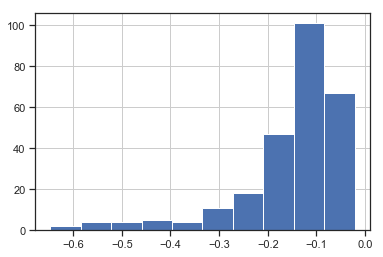

In [114]:
data_cen['cob_uk_ln'] = np.log(data_cen['F1221'])
data_cen['cob_uk_ln'].hist()

# All

In [57]:
'''col_list = data.columns.to_list()

fig, (axs) = plt.subplots(ncols=len(col_list), nrows=1, figsize=(30, 8))

for i in range(len(col_list)):
    data_lsoa.join(data, how = 'inner').dropna(axis=1)\
             .plot(ax=axs[i],
                   column=col_list[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(col_list[i])'''

"col_list = data.columns.to_list()\n\nfig, (axs) = plt.subplots(ncols=len(col_list), nrows=1, figsize=(30, 8))\n\nfor i in range(len(col_list)):\n    data_lsoa.join(data, how = 'inner').dropna(axis=1)             .plot(ax=axs[i],\n                   column=col_list[i], \n                   cmap='YlGnBu',\n                   linewidth=0.2, edgecolor='black',\n                   #legend=True\n                  )             .set_title(col_list[i])"

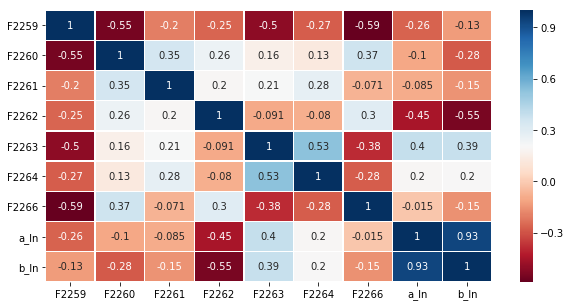

In [77]:
'''
F2259: "Christian"
F2260: "Buddhist"
F2261: "Hindu"
F2262: "Jewish"
F2263: "Muslim"
F2264: "Sikh"
F2265: "Other religion"
F2266: "No religion"
F2267: "Religion not stated"
'''

religion = ['F2259', 'F2260', 'F2261', 'F2262', 'F2263', 'F2264', 'F2266']

plt.subplots(figsize=(10,5))
sns.heatmap(data_cen[religion].join(data_imd[['a_ln', 'b_ln']]).corr(), annot=True, cmap='RdBu', linewidths=.5)
plt.show()

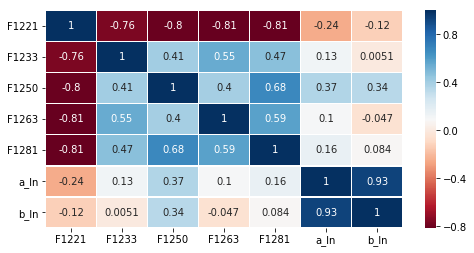

In [70]:
'''
F1221: "Europe\ United Kingdom"
F1233: "Europe\ Other Europe"
F1250: "Africa"
F1263: "Middle East and Asia"
F1281: "The Americas and the Caribbean"
F1290: "Antarctica and Oceania"
F1296: "Other"
'''

cob = ['F1221', 'F1233', 'F1250', 'F1263', 'F1281']#, 'F1290']

plt.subplots(figsize=(8,4))
sns.heatmap((data_cen[cob].join(data_imd[['a_ln', 'b_ln']])).corr(), annot=True, cmap='RdBu', linewidths=.5)
plt.show()

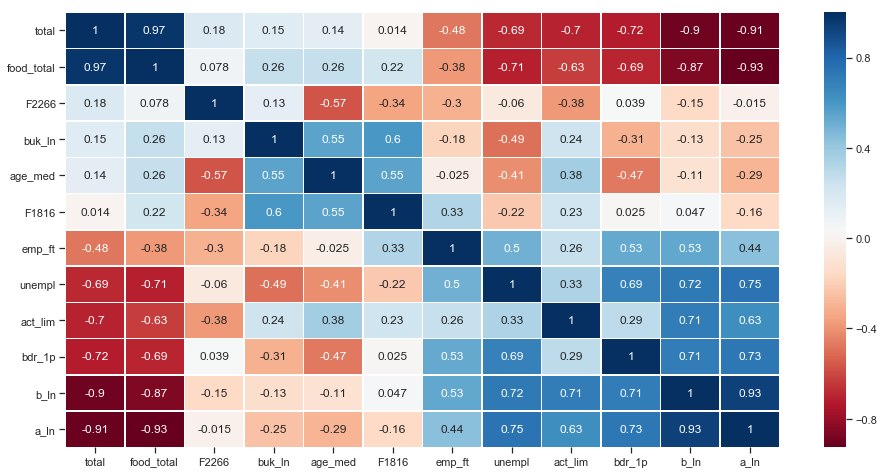

In [115]:
col_names={'F185':'age_med', 'F184':'age_mean', 'F1916':'act_lim', 'F1399':'unempl', 'TOTAL':'total'}

cen_keep = ['F2266', 'buk_ln', 'F185', 'F1816', 'emp_ft', 'F1399', 'F1916', 'bdr_1p']
data_co2['food_total'] = data_co2[col_FoodDrink].sum(axis=1)
data = data_co2[['TOTAL', 'food_total']].join(data_cen[cen_keep], how='inner').join(data_imd[['b_ln', 'a_ln']]).rename(columns=col_names)

plt.subplots(figsize=(16,8))
sns.heatmap(data.corr(), annot=True, cmap='RdBu', linewidths=.5)
plt.show()

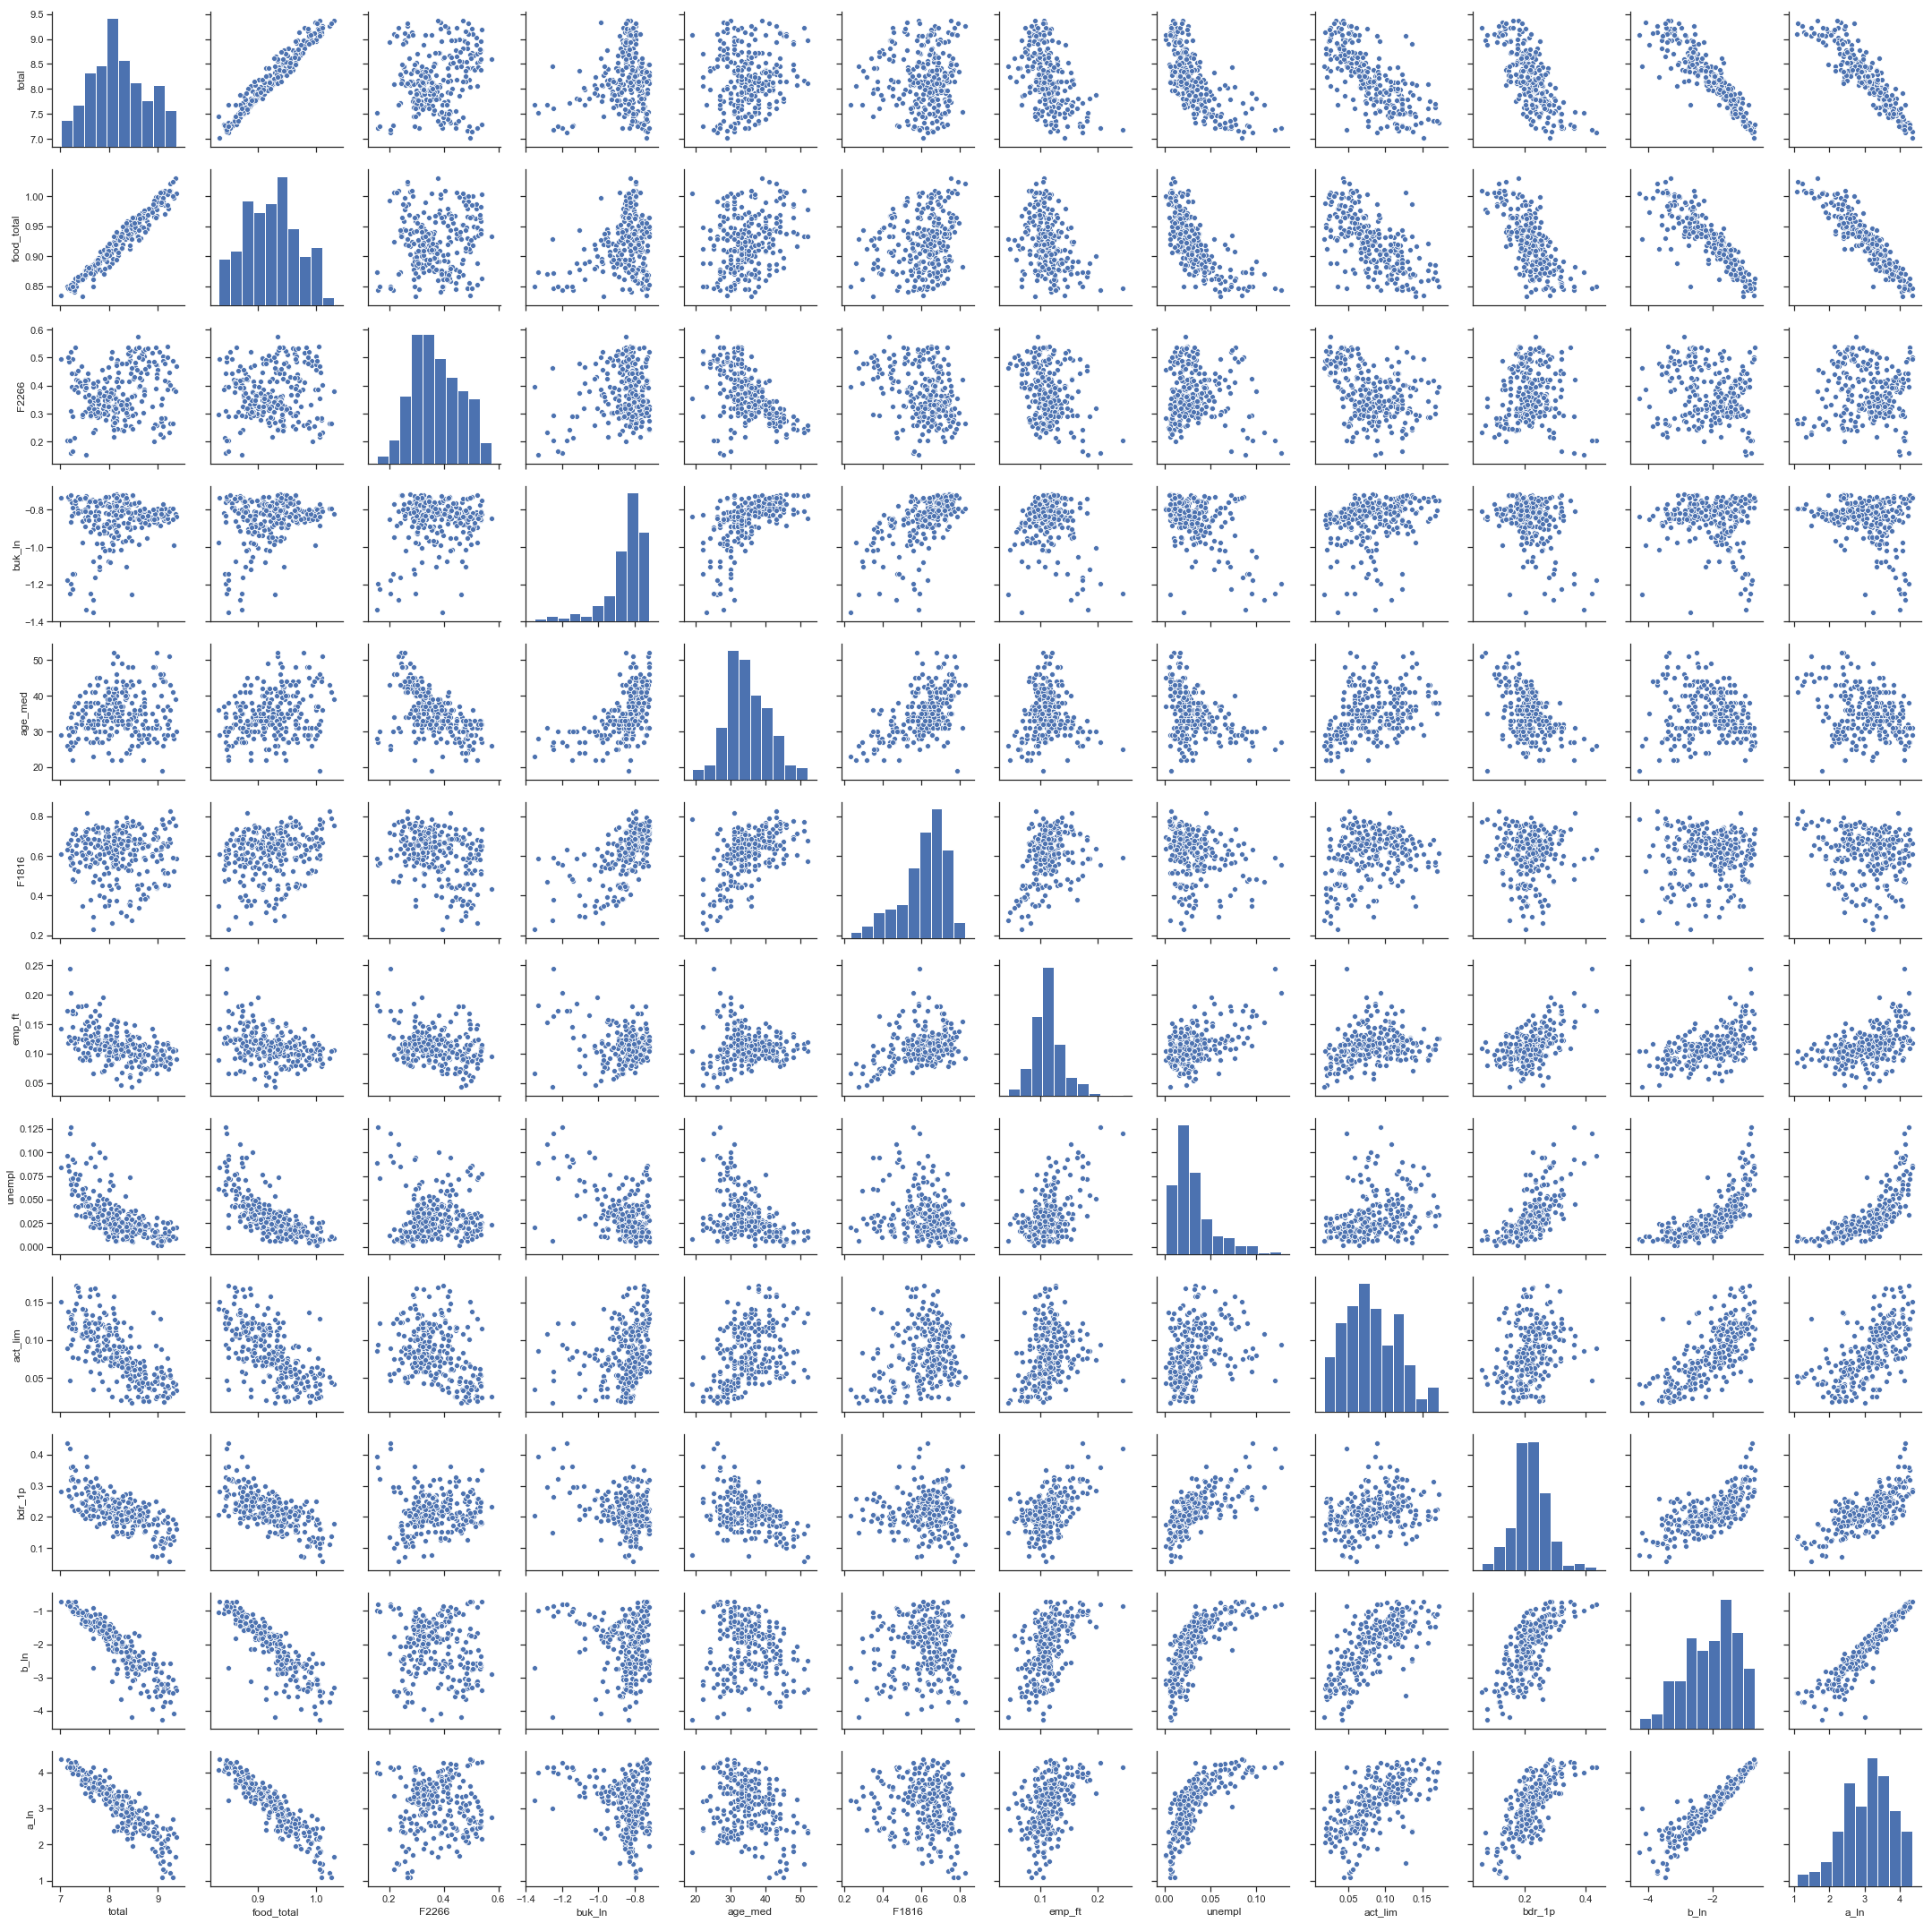

In [116]:
sns.set(style="ticks")
sns.pairplot(data)

# Regression

In [92]:
data.head()

total  food_total  age_med    bdr_1p   act_lim    emp_ft     F1816  \
LSOA                                                                            
E01014485  8.178       0.922     33.0  0.211353  0.068244  0.156212  0.568571   
E01014486  7.806       0.891     30.0  0.226015  0.079845  0.165730  0.482446   
E01014487  8.783       0.959     28.0  0.177045  0.039000  0.110512  0.523169   
E01014488  8.519       0.947     31.0  0.225847  0.051179  0.148148  0.581699   
E01014489  8.044       0.908     29.0  0.201754  0.065751  0.150772  0.431567   

             buk_ln    unempl     F2266     F1221     F1816      a_ln  \
LSOA                                                                    
E01014485 -0.924997  0.034440  0.492570  0.800111  0.568571  3.158362   
E01014486 -1.052848  0.100187  0.381096  0.706114  0.482446  3.892677   
E01014487 -0.857432  0.020216  0.534500  0.855343  0.523169  2.853939   
E01014488 -0.896050  0.035760  0.523833  0.823381  0.581699  3.204331   
E01014489 -0.939125  0.076294  0.496879  0.787181  0.431567  3.622125   

               b_ln  
LSOA                 
E01014485 -1.720314  
E01014486 -1.087643  
E01014487 -2.717949  
E01014488 -1.660679  
E01014489 -1.514082

In [97]:
m5=sm.ols('total ~ a_ln + F2266', data).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     830.5
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          1.22e-113
Time:                        15:32:44   Log-Likelihood:                 40.591
No. Observations:                 263   AIC:                            -75.18
Df Residuals:                     260   BIC:                            -64.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0390      0.080    125.789      0.000       9.882      10.196
a_ln          -0.7293      0.018    -39.976      0.000      -0.765      -0.693
F2266          1.0694      0.146      7.317      0.000       0.782       1.357
==============================================================================
Omnibus:                        4.928   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.669
Skew:                           0.269   Prob(JB):                       0.0968
Kurtosis:                       3.370   Cond. No.                         40.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
m4=sm.ols('total ~ b_ln + F1816', data).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     576.5
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           2.67e-96
Time:                        15:33:13   Log-Likelihood:                0.20274
No. Observations:                 263   AIC:                             5.595
Df Residuals:                     260   BIC:                             16.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7112      0.091     73.765      0.000       6.532       6.890
b_ln          -0.6343      0.019    -33.952      0.000      -0.671      -0.598
F1816[0]       0.1373      0.065      2.121      0.035       0.010       0.265
F1816[1]       0.1373      0.065      2.121      0.035       0.010       0.265
==============================================================================
Omnibus:                       19.253   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.643
Skew:                          -0.351   Prob(JB):                     1.49e-09
Kurtosis:                       4.794   Cond. No.                     1.83e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.12e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [102]:
m2=sm.ols('total ~ age_med + b_ln', data).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     570.2
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           8.54e-96
Time:                        15:33:48   Log-Likelihood:               -0.97268
No. Observations:                 263   AIC:                             7.945
Df Residuals:                     260   BIC:                             18.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7632      0.092     73.749      0.000       6.583       6.944
age_med        0.0036      0.002      1.465      0.144      -0.001       0.008
b_ln          -0.6294      0.019    -33.365      0.000      -0.667      -0.592
==============================================================================
Omnibus:                       26.015   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.267
Skew:                          -0.463   Prob(JB):                     8.19e-14
Kurtosis:                       5.155   Cond. No.                         217.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#compare distributions of predicted and actual values for both models 
f,ax=plt.subplots(1, figsize=(9, 6))
sns.kdeplot(data['total'], shade=True, ax=ax, label='$y$')
sns.kdeplot(m1.fittedvalues, shade=True, ax=ax, label='$\hat{y}$')

plt.show()